# Importy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files (x86)\microsoft visual studio\shared\python37_64\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install sktime

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files (x86)\microsoft visual studio\shared\python37_64\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install tslearn

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files (x86)\microsoft visual studio\shared\python37_64\python.exe -m pip install --upgrade pip' command.


# Načtení a příprava dat

In [10]:
df =pd.read_csv("./labeled-dataset-clean.csv",  header=None)

In [11]:
import numpy as np
from sklearn.linear_model import RidgeClassifierCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

from sktime.datasets import load_arrow_head  # univariate dataset
from sktime.datasets import load_basic_motions  # multivariate dataset
from sktime.transformations.panel.rocket import Rocket

In [12]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler, TimeSeriesScalerMinMax

In [13]:
p = df.values

In [14]:
(p.shape[1] - 22 - 2) / 12

501.0

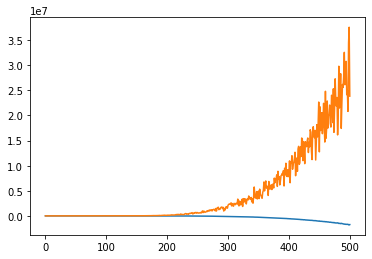

In [35]:
#vykresleni prubehu Er a PATO z konkretniho radku datasetu 
nop = 22
vals = p[905][nop:] #urceni cisla radku
vals = vals[:len(vals)-2]

vals_i = []
vals_ii = []

for i in range(5, len(vals), 12):
    vals_i.append(vals[i])
    
for j in range(10, len(vals), 12):
    vals_ii.append(vals[j])

plt.plot(vals_i)
plt.plot(vals_ii)

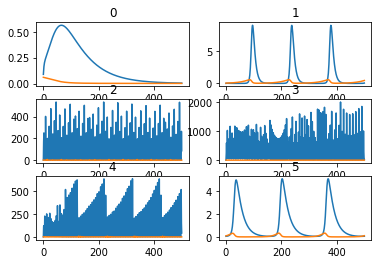

In [11]:
#vykresleni 6 prubehu z datasetu
nop = 22

figure, axis = plt.subplots(3, 2)
cnt = 0 #urceni prvni simulace k vykresleni - spolecne se vykresli i nasledujicich 5

for i in range(0, 3):
    for j in range(0, 2):
        vals = p[cnt][nop:]
        vals = vals[:-2]

        vals_i = []
        vals_ii = []

        for k in range(5, len(vals), 12):
            vals_i.append(vals[k])
    
        for l in range(10, len(vals), 12):
            vals_ii.append(vals[l])

        axis[i,j].plot(vals_i)
        axis[i,j].plot(vals_ii)
        axis[i,j].set_title(str(cnt))
        
        cnt += 1

In [12]:
nof_params = 22
nof_vars = 12
nof_samples = int((p.shape[1] - nof_params - 1)/ nof_vars)
pre_ts = p[:,nof_params:nof_params+nof_samples*nof_vars]
pre_ts /= pre_ts.max(axis=1)[:,None]
ts = np.reshape(pre_ts, (p.shape[0], nof_samples, nof_vars))[:,:,[5, 10]]

In [13]:
ts.shape

(70, 501, 2)

# Predikce

In [14]:
nof_clusters = 7
# X_train = TimeSeriesScalerMeanVariance().fit_transform(ts)
# X_train = TimeSeriesScalerMinMax().fit_transform(ts)
X_train = TimeSeriesResampler(sz=100).fit_transform(ts)
sz = X_train.shape[1]

model = TimeSeriesKMeans(n_clusters=nof_clusters, metric="softdtw",
                           metric_params={"gamma": 0.1},
                            max_iter=50, random_state=1234, n_jobs=-1, n_init=5)
model.fit(X_train)
#y_pred = model.fit_predict(X_train)
y_pred = model.predict(X_train)

In [15]:
y_pred

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 3, 2, 3, 5, 2, 2, 3, 3, 3, 5,
       5, 0, 5, 6, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6,
       6, 6, 6, 6], dtype=int64)

In [16]:
X_train.shape

(70, 100, 2)

In [17]:
from collections import Counter

In [18]:
#cislo klastru + labely prubehu do nej zarazenych
for i in range(nof_clusters):
    print(i)
    for j, idx in enumerate(np.where(y_pred == i)[0]): 
        print(p[idx][-1])
    print()

0
alergie
chronicka-nemoc
chronicky-zanet
chronicky-zanet
chronicky-zanet
neplausibilni
neplausibilni
neplausibilni
neplausibilni
neplausibilni
neplausibilni
neplausibilni
neplausibilni
neplausibilni
smrt-er
smrt-er
smrt-er
smrt-er
smrt-er
smrt-er
smrt-er
smrt-er
smrt-er
smrt-pato
smrt-pato
smrt-pato
smrt-pato
smrt-pato
smrt-pato
vyleceno

1
smrt-er

2
chronicka-nemoc
chronicka-nemoc
chronicka-nemoc
chronicka-nemoc

3
chronicka-nemoc
chronicka-nemoc
chronicka-nemoc
chronicka-nemoc
chronicky-zanet
neplausibilni
smrt-pato
smrt-pato
smrt-pato
smrt-pato

4
alergie
alergie
alergie
alergie
alergie
alergie
alergie
alergie
alergie
chronicky-zanet
chronicky-zanet

5
chronicka-nemoc
chronicky-zanet
chronicky-zanet
chronicky-zanet

6
chronicky-zanet
vyleceno
vyleceno
vyleceno
vyleceno
vyleceno
vyleceno
vyleceno
vyleceno
vyleceno



klastr 0 : 
9, 11, 23, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 46, 47, 48, 49, 53, 54, 56, 57, 58, 59, 60, 
klastr 1 : 
45, 
klastr 2 : 
10, 13, 16, 17, 
klastr 3 : 
12, 14, 18, 19, 20, 39, 50, 51, 52, 55, 
klastr 4 : 
0, 1, 2, 3, 4, 5, 6, 7, 8, 26, 28, 
klastr 5 : 
15, 21, 22, 24, 
klastr 6 : 
25, 61, 62, 63, 64, 65, 66, 67, 68, 69, 


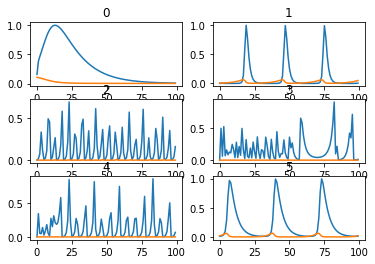

In [20]:
#pokusy - aneb rozklastrovani a kontrola modifikace dat

for i in range(nof_clusters):
    print("klastr " + str(i) + " : " )
    for j, idx in enumerate(np.where(y_pred == i)[0]): 
        print(idx, end=", ")
    print()

#plt.plot(X_train[2,:,:])

figure, axis = plt.subplots(3, 2)
cnt = 0

for i in range(0, 3):
    for j in range(0, 2):
        axis[i,j].plot(X_train[cnt,:,:])
        axis[i,j].set_title(str(cnt))
        cnt += 1

    #plt.figure(figsize=(15,15))
    #plt.subplot(3, 3, i + 1)
    #plt.plot(X_train[0,:,:])
    

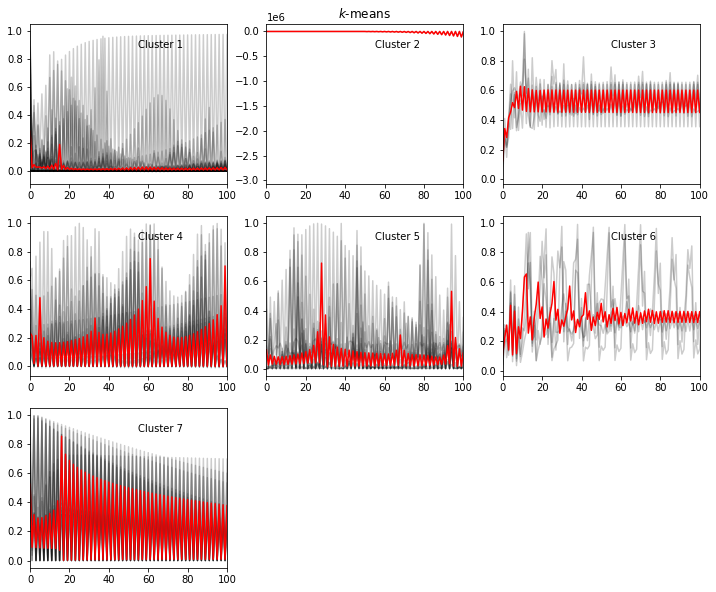

In [21]:
km = model
plt.figure(figsize=(12,10))
for yi in range(nof_clusters):
    plt.subplot(3, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    #plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("$k$-means")

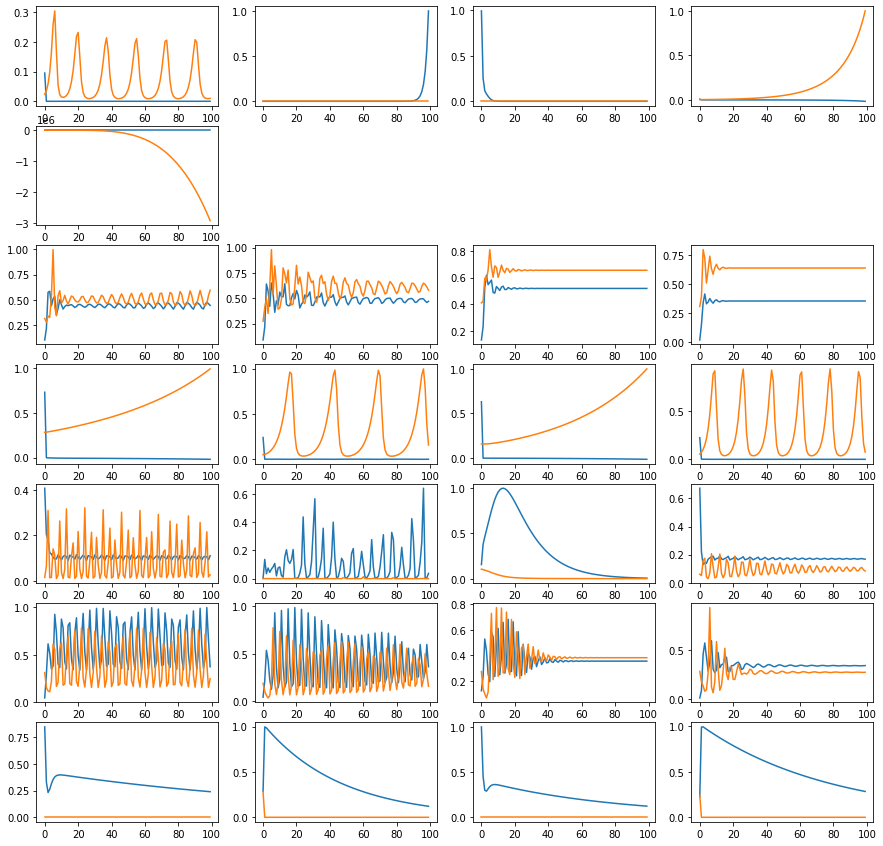

In [22]:
n = nof_clusters
nn = 4 #tolikrat probehne vnitrni cyklus

plt.figure(figsize=(15,15))

for i in range(n):
    sims_in_cluster = []
    for j, idx in enumerate(np.where(y_pred == i)[0]): 
        #prochazi veci v tride
        #np.where vyplivne indexy kde plati podminka
        sims_in_cluster.append(idx)
        
    for k in range(nn):
        if len(sims_in_cluster) == 0:
            break
        else:
            chosen = random.choice(sims_in_cluster)
            plt.subplot(n, nn, nn*i+k+1)
            plt.plot(X_train[chosen,:,:])
            sims_in_cluster.remove(chosen)


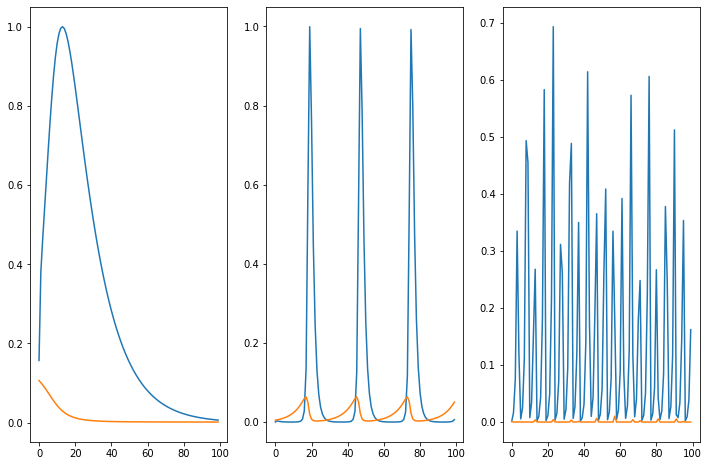

In [23]:
plt.figure(figsize=(12,8))
plt.subplot(1, 3, 1)
plt.plot(X_train[0,:,:])
plt.subplot(1, 3, 2)
plt.plot(X_train[1,:,:])
plt.subplot(1, 3, 3)
plt.plot(X_train[2,:,:])


In [24]:
plt.plot(X_train[168,:,:])

IndexError: index 168 is out of bounds for axis 0 with size 70

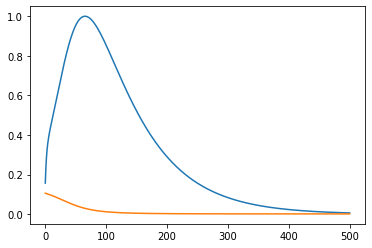

In [25]:
plt.plot(ts[0,:,:])

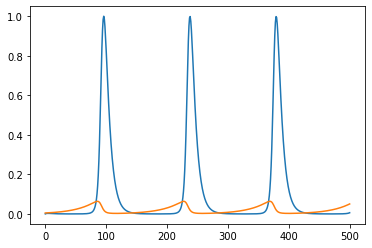

In [26]:
plt.plot(ts[1,:,:])

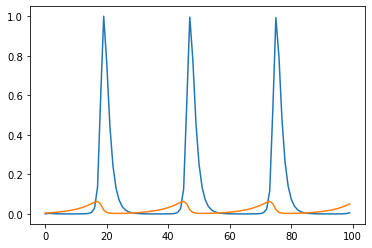

In [27]:
plt.plot(X_train[1,:,:])